**Algerian Forest Fires Linear Regression**

In [1]:
import pandas as pd

# Load the data
file_path = r'C:\Users\kunch\Downloads\Algerian_forest_fires_cleaned.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


**Data Cleaning and Preprocessing**

In [2]:
# Checking for missing values
missing_values = data.isnull().sum()
print("Missing values in each column:\n", missing_values)



Missing values in each column:
 day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64


In [3]:
data.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


** Drop the 'year' column as it has no variability**

In [4]:

data.drop('year', axis=1, inplace=True)

**Convert 'day' and 'month' to cyclical features**

In [5]:
import numpy as np

data['day_sin'] = np.sin(2 * np.pi * data['day'] / 31)
data['day_cos'] = np.cos(2 * np.pi * data['day'] / 31)
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)
data.drop(['day', 'month'], axis=1, inplace=True)

In [6]:
data['Classes'].unique()

array(['not fire   ', 'fire   ', 'fire', 'fire ', 'not fire', 'not fire ',
       'not fire     ', 'not fire    '], dtype=object)

In [7]:
# Remove leading and trailing spaces
data['Classes'] = data['Classes'].str.strip()

# Verify unique values after removing spaces
unique_classes = data['Classes'].unique()
print(unique_classes)


['not fire' 'fire']


In [8]:
class_mapping = {'fire': 1, 'not fire': 0}

# Map the values
data['Classes'] = data['Classes'].map(class_mapping)

**Divide into features (X) and target variable (y)**

In [9]:

X = data.drop(['Classes'], axis=1)  # Features
y = data['Classes']  # Target variable

**HeatMap to Find the Correlation Between Features**

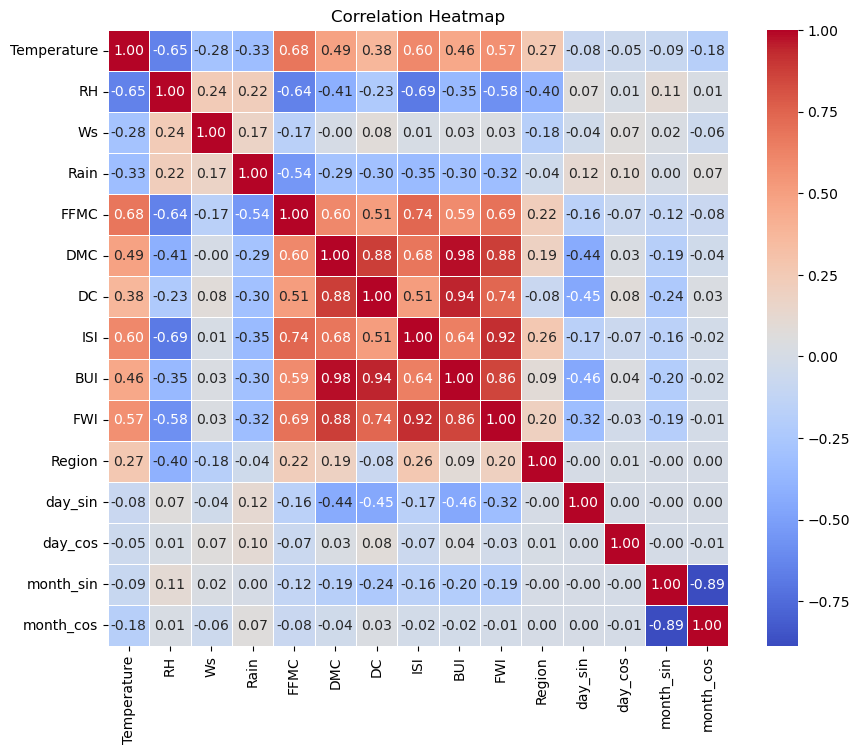

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame
correlation_matrix = X.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


**DMC and BUI is having a High Corellation so we are Droping DMC**

In [11]:
X =X.drop(['DMC'],axis=1)


**train test split**

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Standardizing**

In [13]:
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
continuous_features = ['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DC', 'ISI', 'BUI', 'FWI']

# Fitting the scaler on the training data and transforming both training and testing data
X_train[continuous_features] = scaler.fit_transform(X_train[continuous_features])
X_test[continuous_features] = scaler.transform(X_test[continuous_features])



**Multiple Linear Regression**


In [14]:

from sklearn.linear_model import LinearRegression

print("Multiple Linear Regression:")
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)


Multiple Linear Regression:


LinearRegression()

**Multiple Linear Regression Model Evaluation**

In [15]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Make predictions on the test set
y_pred = linear_regression.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r2}")




Model Evaluation:
Mean Absolute Error (MAE): 0.25464343715939
Mean Squared Error (MSE): 0.087948768137464
R-squared (R²): 0.644503379969611


In [16]:
import pickle
# Save the model to disk
filename = 'linear_regression_model.pkl'
pickle.dump(linear_regression, open(filename, 'wb'))

**Polynomial Regression**

In [17]:
from sklearn.preprocessing import PolynomialFeatures

# Transform the features into polynomial features
degree = 2  # Example degree, you can change this
poly = PolynomialFeatures(degree)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

# Train the polynomial regression model
poly_regression = LinearRegression()
poly_regression.fit(X_poly_train, y_train)




LinearRegression()

**Evaluation of Polynomial Regression Model**

In [18]:
# Make predictions on the test set
y_poly_pred = poly_regression.predict(X_poly_test)

# Evaluate the polynomial regression model
mae_poly = mean_absolute_error(y_test, y_poly_pred)
mse_poly = mean_squared_error(y_test, y_poly_pred)
r2_poly = r2_score(y_test, y_poly_pred)

print("Polynomial Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_poly}")
print(f"Mean Squared Error (MSE): {mse_poly}")
print(f"R-squared (R²): {r2_poly}")

Polynomial Regression Model Evaluation:
Mean Absolute Error (MAE): 0.23953496193399235
Mean Squared Error (MSE): 0.12422612068072265
R-squared (R²): 0.4978671451945874


In [19]:
#Download the pickel file

filename = 'polynomial_regression_model.pkl'
pickle.dump(poly_regression, open(filename, 'wb'))

**Lasso Regression**

In [20]:
from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso = Lasso()
lasso.fit(X_train, y_train)






Lasso()

**Lasso Regression Evaluation**

In [21]:
y_lasso_pred = lasso.predict(X_test)
# Evaluate Lasso Regression

mae_lasso = mean_absolute_error(y_test, y_lasso_pred)
mse_lasso = mean_squared_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)

print("Lasso Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_lasso}")
print(f"Mean Squared Error (MSE): {mse_lasso}")
print(f"R-squared (R²): {r2_lasso}")

Lasso Regression Model Evaluation:
Mean Absolute Error (MAE): 0.49316221333894383
Mean Squared Error (MSE): 0.24765259488852404
R-squared (R²): -0.0010334685645558839


In [22]:
#Download the pickel file

filename = 'lasso_model.pkl'
pickle.dump(lasso, open(filename, 'wb'))

**Ridge Regression**

In [23]:

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)


Ridge()

**Ridge Regression Evaluation**

In [24]:
y_ridge_pred = ridge.predict(X_test)

# Evaluate Ridge Regression
mae_ridge = mean_absolute_error(y_test, y_ridge_pred)
mse_ridge = mean_squared_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Ridge Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae_ridge}")
print(f"Mean Squared Error (MSE): {mse_ridge}")
print(f"R-squared (R²): {r2_ridge}")

Ridge Regression Model Evaluation:
Mean Absolute Error (MAE): 0.25656887916449334
Mean Squared Error (MSE): 0.08815553006225472
R-squared (R²): 0.6436676301692363


In [25]:
#Download the pickel file

filename = 'ridge_model.pkl'
pickle.dump(ridge, open(filename, 'wb'))

**Cross-Validation and Hyperparameter Tuning**


**Lasso with GridSearchCV**

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Lasso and Ridge
param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100]
}


lasso_cv = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_cv.fit(X_train, y_train)
print("Best parameters for Lasso:", lasso_cv.best_params_)


Best parameters for Lasso: {'alpha': 0.01}


**Lasso model Evaluation**

In [27]:
# Evaluate the best Lasso model
y_lasso_cv_pred = lasso_cv.predict(X_test)
print("Lasso Regression with GridSearchCV Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_lasso_cv_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_lasso_cv_pred)}")
print(f"R-squared (R²): {r2_score(y_test, y_lasso_cv_pred)}")


Lasso Regression with GridSearchCV Model Evaluation:
Mean Absolute Error (MAE): 0.269752880597762
Mean Squared Error (MSE): 0.09360085973393792
R-squared (R²): 0.6216571309407661


In [28]:
#Download the pickel file

filename = 'lasso_cv_model.pkl'
pickle.dump(lasso_cv, open(filename, 'wb'))

**Ridge with GridSearchCV**

In [29]:

ridge_cv = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_cv.fit(X_train, y_train)
print("Best parameters for Ridge:", ridge_cv.best_params_)



Best parameters for Ridge: {'alpha': 1}


**Evaluation of  Ridge with GridSearchCV model**

In [30]:
# Evaluate the best Ridge model
y_ridge_cv_pred = ridge_cv.predict(X_test)
print("Ridge Regression with GridSearchCV Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_ridge_cv_pred)}")
print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_ridge_cv_pred)}")
print(f"R-squared (R²): {r2_score(y_test, y_ridge_cv_pred)}")

Ridge Regression with GridSearchCV Model Evaluation:
Mean Absolute Error (MAE): 0.25656887916449334
Mean Squared Error (MSE): 0.08815553006225472
R-squared (R²): 0.6436676301692363


In [31]:
#Download the pickel file

filename = 'ridge_cv_model.pkl'
pickle.dump(ridge_cv, open(filename, 'wb'))

**Testing the Models with an unseen Data**

In [34]:
unseen_data = pd.DataFrame({
    'day': [5],
    'month': [6],
    'year': [2012],
    'Temperature': [27],
    'RH': [77],
    'Ws': [16],
    'Rain': [0.0],
    'FFMC': [64.8],
    'DMC': [3.0],
    'DC': [14.2],
    'ISI': [1.2],
    'BUI': [3.9],
    'FWI': [0.5],
    'Region': [0]
})

# Preprocessing: Convert 'day' and 'month' to cyclical features and drop unnecessary columns
unseen_data['day_sin'] = np.sin(2 * np.pi * unseen_data['day'] / 31)
unseen_data['day_cos'] = np.cos(2 * np.pi * unseen_data['day'] / 31)
unseen_data['month_sin'] = np.sin(2 * np.pi * unseen_data['month'] / 12)
unseen_data['month_cos'] = np.cos(2 * np.pi * unseen_data['month'] / 12)
unseen_data.drop(['day', 'month', 'year', 'DMC'], axis=1, inplace=True)


# Standardize the continuous features in the custom input data
unseen_data[continuous_features] = scaler.transform(unseen_data[continuous_features])

# Function to classify prediction
def classify_prediction(pred):
    return 'fire' if pred >= 0.5 else 'not fire'


# Load Linear Regression model from pickle file
linear_regression_model = pickle.load(open('linear_regression_model.pkl', 'rb'))

# Linear Regression Prediction
y_custom_pred_linear = linear_regression_model.predict(unseen_data)
print("Linear Regression Prediction for Custom Input:", classify_prediction(y_custom_pred_linear[0]))

# Load Polynomial Regression model from pickle file
poly_regression_model = pickle.load(open('polynomial_regression_model.pkl', 'rb'))

# Polynomial Regression Prediction
custom_poly_features = poly.transform(unseen_data)
y_custom_pred_poly = poly_regression_model.predict(custom_poly_features)
print("Polynomial Regression Prediction for Custom Input:", classify_prediction(y_custom_pred_poly[0]))

# Load Lasso Regression model from pickle file
lasso_model = pickle.load(open('lasso_model.pkl', 'rb'))

# Lasso Regression Prediction
y_custom_pred_lasso = lasso_model.predict(unseen_data)
print("Lasso Regression Prediction for Custom Input:", classify_prediction(y_custom_pred_lasso[0]))

# Load Ridge Regression model from pickle file
ridge_model = pickle.load(open('ridge_model.pkl', 'rb'))

# Ridge Regression Prediction
y_custom_pred_ridge = ridge_model.predict(unseen_data)
print("Ridge Regression Prediction for Custom Input:", classify_prediction(y_custom_pred_ridge[0]))

# Load Lasso Regression with GridSearchCV model from pickle file
lasso_cv_model = pickle.load(open('lasso_cv_model.pkl', 'rb'))

# Lasso Regression with GridSearchCV Prediction
y_custom_pred_lasso_cv = lasso_cv_model.predict(unseen_data)
print("Lasso Regression with GridSearchCV Prediction for Custom Input:", classify_prediction(y_custom_pred_lasso_cv[0]))

# Load Ridge Regression with GridSearchCV model from pickle file
ridge_cv_model = pickle.load(open('ridge_cv_model.pkl', 'rb'))

# Ridge Regression with GridSearchCV Prediction
y_custom_pred_ridge_cv = ridge_cv_model.predict(unseen_data)
print("Ridge Regression with GridSearchCV Prediction for Custom Input:", classify_prediction(y_custom_pred_ridge_cv[0]))

Linear Regression Prediction for Custom Input: not fire
Polynomial Regression Prediction for Custom Input: not fire
Lasso Regression Prediction for Custom Input: fire
Ridge Regression Prediction for Custom Input: not fire
Lasso Regression with GridSearchCV Prediction for Custom Input: not fire
Ridge Regression with GridSearchCV Prediction for Custom Input: not fire


Based on the evaluation of multiple regression models, the custom input is predicted to correspond to "not fire," suggesting a lower risk of fire occurrence.